In [1]:
import h2o

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.281-b09, mixed mode)
  Starting server from C:\Users\renat\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\renat\AppData\Local\Temp\tmpocxmrp1s
  JVM stdout: C:\Users\renat\AppData\Local\Temp\tmpocxmrp1s\h2o_renat_started_from_python.out
  JVM stderr: C:\Users\renat\AppData\Local\Temp\tmpocxmrp1s\h2o_renat_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.5
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_renat_59z9zq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.543 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file (url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
train, test = iris.split_frame([0.8], seed=123)

In [6]:
train.nrow

121

In [7]:
test.nrow

29

In [8]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]

In [9]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator

In [10]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
)
%time m_AE_4.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 2.82 s


In [11]:
sh = m_AE_4.score_history()
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2021-03-22 13:05:01,0.090 sec,"0,00000 obs/sec",0.0,0,0.0,0.337379,0.113825
1,,2021-03-22 13:05:01,0.113 sec,5500 obs/sec,1.0,1,121.0,0.263593,0.069481
2,,2021-03-22 13:05:01,0.118 sec,9307 obs/sec,2.0,2,242.0,0.193908,0.037600
3,,2021-03-22 13:05:01,0.123 sec,12100 obs/sec,3.0,3,363.0,0.139888,0.019569
4,,2021-03-22 13:05:01,0.129 sec,14235 obs/sec,4.0,4,484.0,0.110105,0.012123


<AxesSubplot:>

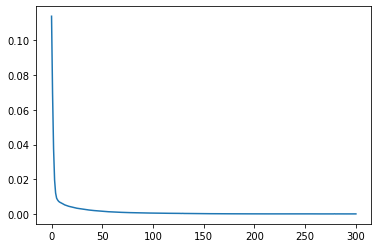

In [12]:
sh["training_mse"].plot()

<AxesSubplot:>

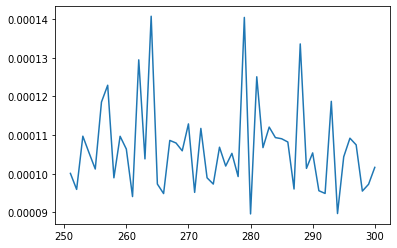

In [13]:
sh["training_mse"].tail(50).plot()

In [14]:
m_AE_4 = H2OAutoEncoderEstimator(
    hidden = [4],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_4.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.1 s


<AxesSubplot:>

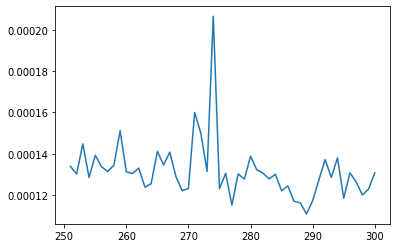

In [15]:
sh = m_AE_4.score_history()
sh["training_mse"].tail(50).plot()

In [20]:
m_AE_3 = H2OAutoEncoderEstimator(
    hidden = [3],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_3.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.07 s


<AxesSubplot:>

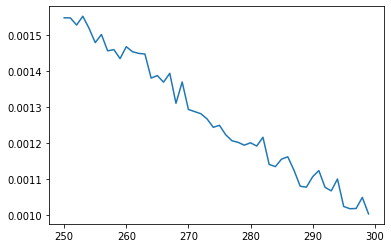

In [21]:
sh = m_AE_3.score_history()
sh["training_mse"].tail(50).plot()

In [22]:
m_AE_2 = H2OAutoEncoderEstimator(
    hidden = [2],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_2.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.06 s


<AxesSubplot:>

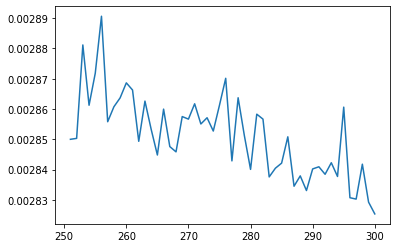

In [23]:
sh = m_AE_2.score_history()
sh["training_mse"].tail(50).plot()

In [24]:
m_AE_1 = H2OAutoEncoderEstimator(
    hidden = [1],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_1.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.06 s


<AxesSubplot:>

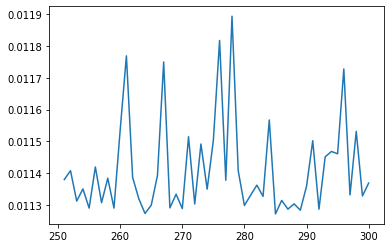

In [25]:
sh = m_AE_1.score_history()
sh["training_mse"].tail(50).plot()

In [26]:
m_AE_10 = H2OAutoEncoderEstimator(
    hidden = [10],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_10.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.07 s


<AxesSubplot:>

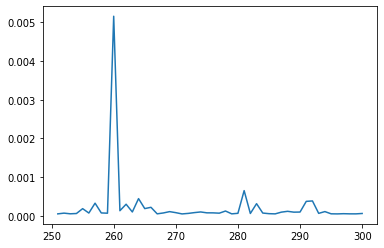

In [27]:
sh = m_AE_10.score_history()
sh["training_mse"].tail(50).plot()

In [28]:
m_AE_5_3_5 = H2OAutoEncoderEstimator(
    hidden = [5,3,5],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_AE_4",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_AE_5_3_5.train (x,None,train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.07 s


<AxesSubplot:>

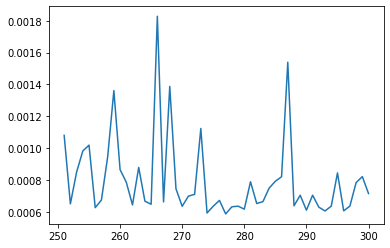

In [29]:
sh = m_AE_5_3_5.score_history()
sh["training_mse"].tail(50).plot()

In [30]:
train_AE_3 = m_AE_3.deepfeatures(train,0) # 0 significa o layer 1

deepfeatures progress: |██████████████████████████████████████████████████| 100%


In [31]:
train_AE_3.dim

[121, 5]

In [32]:
train_AE_3

DF.L1.C1,DF.L1.C2,DF.L1.C3,DF.L1.C4,DF.L1.C5
-0.196416,-0.458386,-0.161542,0.220151,-0.381432
-0.0600597,-0.437611,-0.342838,0.166817,-0.428559
-0.098517,-0.444361,-0.32497,0.247876,-0.431214
-0.0507285,-0.414937,-0.368806,0.232522,-0.454606
-0.211354,-0.45626,-0.151432,0.256154,-0.385189
-0.263624,-0.407588,0.0255477,0.264888,-0.289795
-0.115817,-0.412958,-0.28594,0.318071,-0.409426
-0.157157,-0.440564,-0.210252,0.212635,-0.401375
-0.260056,-0.465492,-0.0398072,0.19257,-0.345287
-0.132737,-0.420177,-0.248238,0.24136,-0.424561


In [33]:
x = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]

In [36]:
m_anomaly16 = H2OAutoEncoderEstimator (
    hidden = [16],
    activation = "Tanh",
    epochs = 300,
    model_id = "m_anomaly16",
    
    train_samples_per_iteration = train.nrow,
    score_interval = 0,
    score_duty_cycle = 1.0,
    stopping_rounds = 15
)
%time m_anomaly16.train(x,None,iris)


deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 1.58 s


In [37]:
anomalies = m_anomaly16.anomaly(iris).cbind(iris).as_data_frame()

In [39]:
s = anomalies.sort_values ("Reconstruction.MSE", ascending= False)

In [40]:
s.head()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
118,0.000750,7.7,2.6,6.9,2.3,Iris-virginica
106,0.000730,4.9,2.5,4.5,1.7,Iris-virginica
122,0.000716,7.7,2.8,6.7,2.0,Iris-virginica
60,0.000680,5.0,2.0,3.5,1.0,Iris-versicolor
57,0.000593,4.9,2.4,3.3,1.0,Iris-versicolor


In [41]:
s.tail()

,Reconstruction.MSE,sepal_len,sepal_wid,petal_len,petal_wid,class
19,0.000144,5.1,3.8,1.5,0.3,Iris-setosa
21,0.000136,5.1,3.7,1.5,0.4,Iris-setosa
22,0.000123,4.6,3.6,1.0,0.2,Iris-setosa
14,0.000120,5.8,4.0,1.2,0.2,Iris-setosa
16,0.000106,5.4,3.9,1.3,0.4,Iris-setosa
